## **04. Descriptive Stadistics**
- Author: Ricardo Castañeda
- Date 11/08/2025
- Goal: 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Credits:
- Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer,
- Archipelago (Antarctica) penguin data. R package version 0.1.0.,
- https://allisonhorst.github.io/palmerpenguins/

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

In [18]:
#step 1 load data

url = 'https://gist.githubusercontent.com/slopp/'
url += 'ce3b90b9168f2f921784de84fa445651/raw/'
url += '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'

df_raw = pd.read_csv(url)
df_raw.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
33,34,Adelie,Dream,40.9,18.9,184.0,3900.0,male,2007
19,20,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007
113,114,Adelie,Biscoe,42.2,19.5,197.0,4275.0,male,2009
208,209,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,female,2008
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
135,136,Adelie,Dream,41.1,17.5,190.0,3900.0,male,2009
159,160,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,male,2007
17,18,Adelie,Torgersen,42.5,20.7,197.0,4500.0,male,2007
28,29,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
160,161,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,female,2007


In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [27]:
# Step 2 - preprocesing
df_baking = df_raw.copy()
df_baking = df_baking.drop(columns=["rowid"])
df_baking = df_baking.dropna()
df_baking['species'] = df_baking['species'].astype('category')
df_baking['island'] = df_baking['island'].astype('category')
df_baking['sex'] = df_baking['sex'].astype('category')


df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


In [29]:
#step 3 EDA (Exploratory Data Analysis)

df.describe().T


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
year,333.0,2008.042042,0.812944,2007.0,2007.0,2008.0,2009.0,2009.0


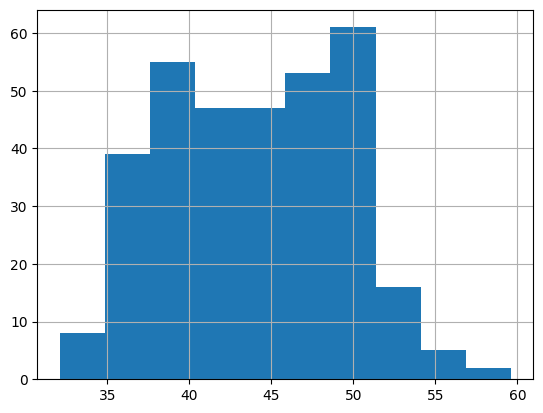

In [33]:
df["bill_length_mm"].hist()
plt.show()

In [ ]:
# describe de strings

df.describe(include='category').T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


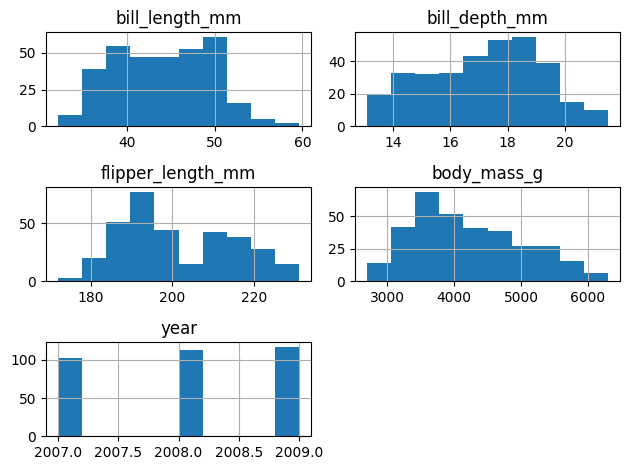

In [36]:
df.hist()
plt.tight_layout()
plt.show()

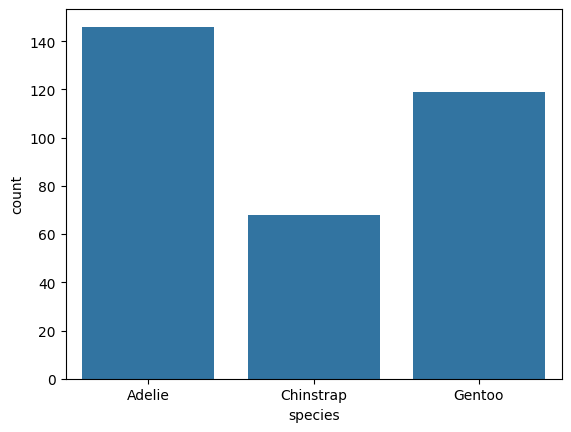

In [37]:
sns.countplot(data= df, x='species')
plt.show()

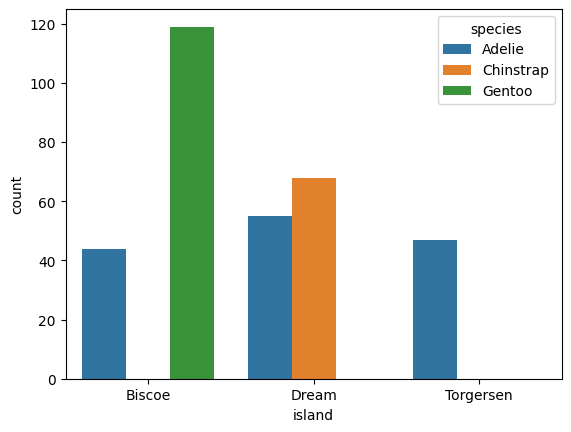

In [42]:
sns.countplot(data= df, x='island', hue='species')
plt.show()

In [43]:
df[["species", "island"]].value_counts()

species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

## Descriptive Stadistics With Timelines

In [2]:
#step 0 : Cargar Librerias y Módulos a la medida
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# paso 1 - cargar data

url = 'https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx'
df_raw = pd.read_excel(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [12]:
df_raw.sample(10)

,Date,Region,Type,Units,Sales
367,2020-04-01,South,Children's Clothing,12.0,176
862,2020-02-26,North,Men's Clothing,NaN,770
870,2020-11-20,North,Women's Clothing,31.0,360
677,2020-06-23,South,Women's Clothing,15.0,348
211,2020-08-28,South,Women's Clothing,7.0,192
415,2020-05-13,East,Children's Clothing,21.0,140
855,2020-04-08,East,Men's Clothing,35.0,243
543,2020-01-16,West,Women's Clothing,12.0,304
559,2020-04-23,South,Women's Clothing,29.0,450
913,2020-05-19,North,Children's Clothing,29.0,560


In [27]:
# step 2 - data pre processing

df_baking = df_raw.copy()
df_baking["Region"] = df_baking["Region"].astype("category")
df_baking["Type"] = df_baking["Type"].astype("category")
df_baking["Units"] = df_baking["Units"].astype("int",errors="ignore")
df_baking["Sales"] = df_baking["Sales"].astype("float")
df_baking.columns = df_baking.columns.str.lower()   #Cambiar títulos de las columnas a minúscula, se recomienda como convenvción general
df_baking = df_baking.set_index("date")
df = df_baking
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-07-11 to 2020-08-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   region  1000 non-null   category
 1   type    1000 non-null   category
 2   units   911 non-null    float64 
 3   sales   1000 non-null   float64 
dtypes: category(2), float64(2)
memory usage: 25.7 KB


In [28]:
# step 3: EDA
display(df.describe(include="number").T)
display(df.describe(include="category").T)

,count,mean,std,min,25%,50%,75%,max
units,911.0,19.638858,9.471309,3.0,12.0,20.0,28.0,35.0
sales,1000.0,427.254000,253.441362,33.0,224.0,380.0,575.0,1155.0


,count,unique,top,freq
region,1000,4,East,411
type,1000,3,Women's Clothing,424


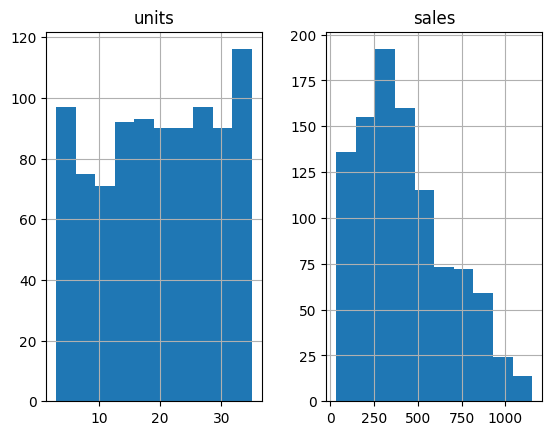

In [29]:
df.select_dtypes("number").hist()
plt.show()

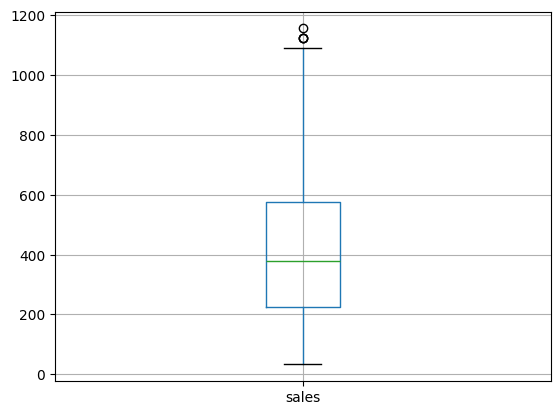

In [30]:
df[["sales"]].boxplot()
plt.show()

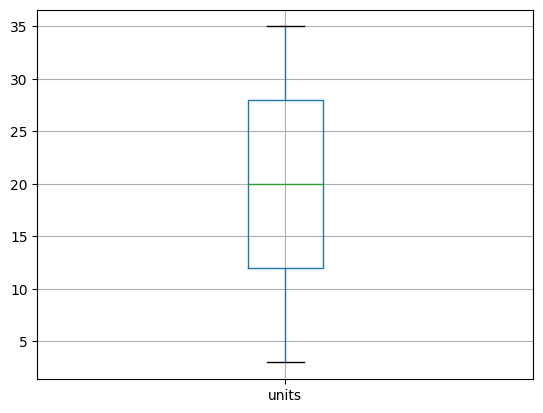

In [31]:
df[["units"]].boxplot()
plt.show()

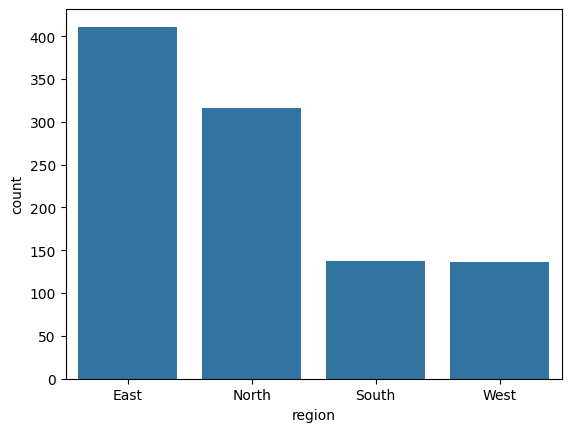

In [32]:
sns.countplot(data=df, x="region")
plt.show()

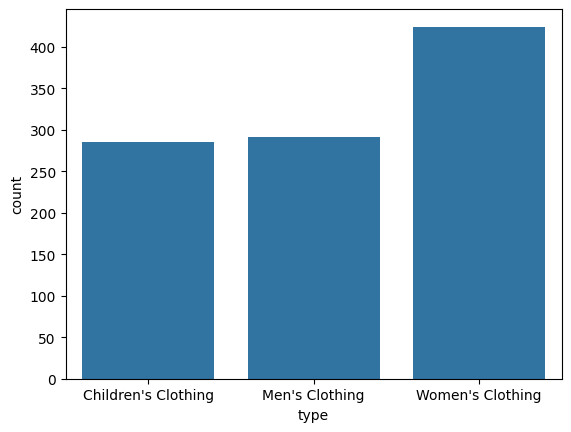

In [33]:
sns.countplot(data=df, x="type")
plt.show()

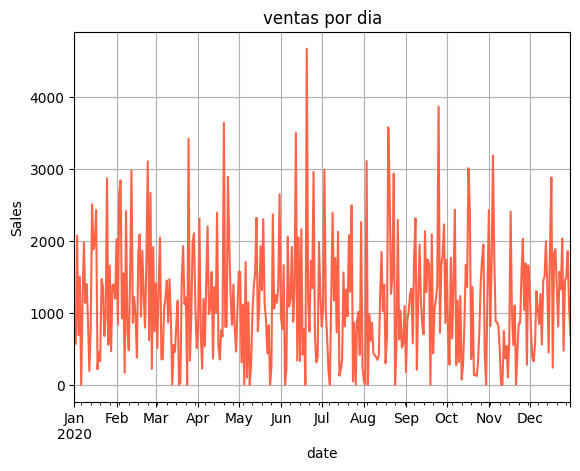

In [35]:
df["sales"].resample("D").sum().plot(title="ventas por dia", c="tomato")
plt.ylabel("Sales")
plt.grid("True")
plt.show()

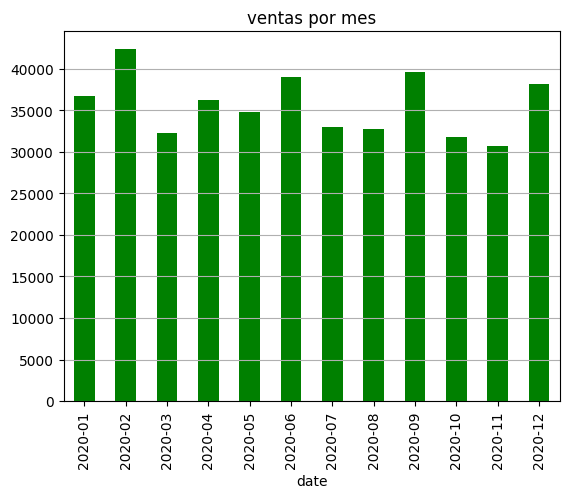

In [38]:
df["sales"].resample("ME").sum().plot(kind="bar", title="ventas por mes", color="green")
plt.gca().xaxis.set_ticklabels(df["sales"].resample("ME").sum().index.to_period("M"))
plt.grid(axis="y")
plt.show()


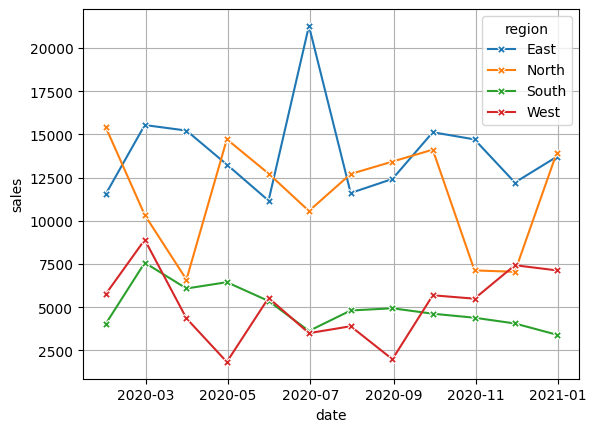

In [43]:
monthly = df.groupby("region", observed=False)["sales"].resample("ME").sum().reset_index()
sns.lineplot(data=monthly, x="date", y="sales", hue="region", marker="X")
plt.grid(True)
plt.show()
